# Data Analysis on Netflix Dataset 

## Introduction to Netflix Content Analysis Project

In the rapidly evolving landscape of streaming media, content is king. As one of the leading players in the industry, Netflix stands at the forefront of this revolution, offering a diverse array of movies, TV shows, and documentaries to a global audience. This project embarked on a comprehensive analysis of Netflix's extensive content library, aiming to uncover insights that could drive strategic decisions and enhance viewer satisfaction.

At the heart of this analysis were several key objectives:

1. **Understanding Content Dynamics:** By dissecting the distribution and characteristics of content, such as genres, ratings, and release years, we sought to understand the current state of Netflix's offerings. This involved exploring how content preferences and trends have evolved and identifying gaps or opportunities in the library.

2. **Director and Rating Analysis:** We delved into the influence of directors on content ratings, exploring whether certain directors were associated with specific content ratings more frequently. This analysis aimed to identify patterns that could inform future director collaborations and content curation strategies.

3. **Cultural and Regional Considerations:** Recognizing Netflix's global reach, we analyzed the correlation between content ratings and countries of origin. This aspect was crucial for tailoring content to different cultural contexts and regulatory environments.

4. **Exploratory Data Analysis (EDA):** EDA played a critical role in this project, offering a visual and statistical examination of the dataset. It provided an intuitive understanding of the data, revealing patterns, anomalies, relationships, and trends.

The culmination of these efforts was geared towards empowering Netflix with data-driven insights. These insights are crucial for making informed decisions about content development, acquisition, and marketing strategies. By aligning its content strategy with viewer preferences and industry trends, Netflix can continue to captivate its audience and maintain its position as a leader in the streaming industry.

This project delves into analyzing Netflix's content trends and patterns using a dataset sourced from Kaggle. The primary focus is to uncover meaningful insights that can help enhance content strategy, viewer engagement, and marketing effectiveness for the platform. The project encompasses the following stages:

### 1. **Data Cleaning and Preprocessing**
   - The raw dataset is meticulously cleaned to handle missing values, inconsistent formats, and redundant information.
   - Data transformations include formatting dates, splitting columns, and ensuring the dataset is primed for analysis.
   - The cleaned data is saved for further processing and visualization.

### 2. **Exploratory Data Analysis (EDA)**
   - **Content Distribution Analysis:** Investigating how content is distributed across movies and TV shows, including release trends over the years.
   - **Genre Popularity:** Identifying the top genres for movies and TV shows to understand viewer preferences and optimize content offerings.
   - **Seasonal Trends:** Analyzing the months or seasons with peak content additions to plan marketing campaigns and predict future trends.
   - **Content Evolution:** Exploring how content types and ratings have changed over time to align with evolving viewer demands and regulatory standards.

### 3. **Business Problem Analysis**
   The project addresses specific business challenges related to:
   - Content distribution trends by release year and type.
   - Identifying dominant genres in movies versus TV shows.
   - Seasonal patterns in content additions.
   These analyses provide actionable insights for better content curation and marketing strategies.

### 4. **Dashboard Creation**
   - An interactive **Power BI dashboard** will be developed using the cleansed dataset to visualize key findings.
   - The dashboard will provide stakeholders with a user-friendly interface to explore content trends, genre performance, and seasonal patterns.
   - It will enable data-driven decisions to enhance Netflix’s competitive advantage in the streaming industry.

### Outcomes and Applications:
This project aims to uncover trends in Netflix's content strategy, providing insights for:
   - Tailoring content acquisition to match viewer preferences.
   - Optimizing marketing campaigns during peak content release periods.
   - Enhancing the overall content library to cater to diverse audience segments.

The integration of data cleaning, exploratory analysis, and visualization ensures a comprehensive understanding of Netflix’s content dynamics. This structured approach lays a strong foundation for future analyses and decision-making processes.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [42]:
netflix_data= pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
netflix_data.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [44]:
netflix_data.shape

(8807, 12)

# Data Cleaning

In [45]:
# Check for null values in each column
null_values = netflix_data.isnull().sum()
print(null_values)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


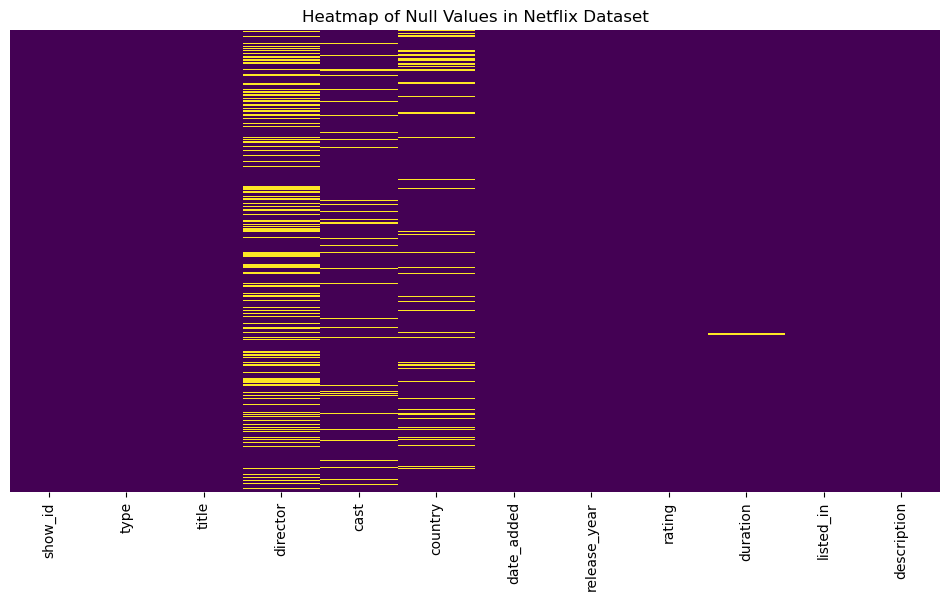

In [46]:
# Visualize null values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(netflix_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Null Values in Netflix Dataset')
plt.show()


In [47]:
# Fill NaN values for 'director', 'cast', and 'country' with 'Not Specified'
netflix_data['director'].fillna('Not Specified', inplace=True)
netflix_data['cast'].fillna('Not Specified', inplace=True)
netflix_data['country'].fillna('Not Specified', inplace=True)

# Verify the changes
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [49]:
# Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Convert 'release_year' from int to datetime by assuming the release date is the first day of the given year
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'].astype(str) + '-01-01')

# Check the data types to confirm the changes
netflix_data.dtypes      

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [50]:
# Forward fill
netflix_data['date_added'].fillna(method='ffill', inplace=True)

In [51]:
# Fill NaN values in 'rating' column with the mode (most common value)
rating_mode = netflix_data['rating'].mode()[0]
netflix_data['rating'].fillna(rating_mode, inplace=True)

# Verify the changes by checking if there are any NaN values left in 'rating'
netflix_data['rating'].isnull().sum()

0

In [52]:
# Replace 'netflix_data' with your actual DataFrame variable name if it's different
netflix_data.dropna(subset=['duration'], inplace=True)

In [53]:
# Assuming netflix_data is your DataFrame
netflix_data['duration_minutes'] = None
netflix_data['number_of_seasons'] = None

# Loop through the DataFrame and populate the new columns
for index, row in netflix_data.iterrows():
    duration = row['duration']
    if 'min' in duration:
        # Extract minutes and convert to integer
        netflix_data.at[index, 'duration_minutes'] = int(duration.replace('min', '').strip())
    elif 'Season' in duration:
        # Extract seasons and convert to integer
        netflix_data.at[index, 'number_of_seasons'] = int(duration.split()[0])


In [54]:
# Dropping the 'duration' column from the DataFrame
netflix_data = netflix_data.drop(columns=['duration'])
# Now netflix_data no longer has the 'duration' column


In [55]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,number_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020-01-01,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,None
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",None,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021-01-01,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,None,1
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,2021-09-24,2021-01-01,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",None,1
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,None,2


In [56]:
# Fill 'Not a Movie' where duration_minutes is None
netflix_data['duration_minutes'] = netflix_data['duration_minutes'].fillna('Not a Movie')

# Fill 'Not a TV Show' where number_of_seasons is None
netflix_data['number_of_seasons'] = netflix_data['number_of_seasons'].fillna('Not a TV Show')


In [57]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,number_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020-01-01,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,Not a TV Show
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Not a Movie,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021-01-01,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Not a Movie,1
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,2021-09-24,2021-01-01,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Not a Movie,1
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Not a Movie,2


In [58]:
# Check for null values in each column
null_values = netflix_data.isnull().sum()
print(null_values)


show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
listed_in            0
description          0
duration_minutes     0
number_of_seasons    0
dtype: int64


In [59]:
# Save the DataFrame as a CSV file
netflix_data.to_csv('netflix_insights.csv', index=False)

In [60]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8804 non-null   object        
 1   type               8804 non-null   object        
 2   title              8804 non-null   object        
 3   director           8804 non-null   object        
 4   cast               8804 non-null   object        
 5   country            8804 non-null   object        
 6   date_added         8804 non-null   datetime64[ns]
 7   release_year       8804 non-null   datetime64[ns]
 8   rating             8804 non-null   object        
 9   listed_in          8804 non-null   object        
 10  description        8804 non-null   object        
 11  duration_minutes   8804 non-null   object        
 12  number_of_seasons  8804 non-null   object        
dtypes: datetime64[ns](2), object(11)
memory usage: 1.2+ MB


# Exploratory Data Analysis 

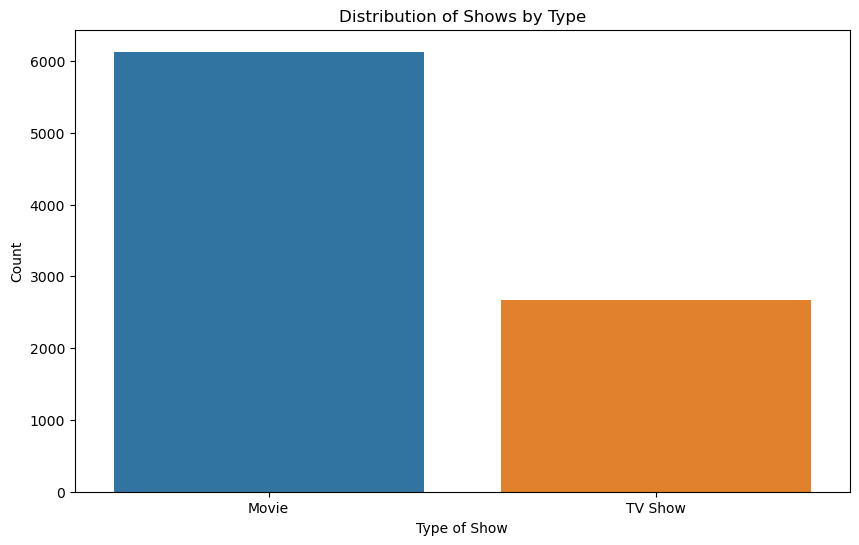

In [61]:
# EDA - Exploratory Data Analysis

# Distribution of shows by type
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data, x='type')
plt.title('Distribution of Shows by Type')
plt.xlabel('Type of Show')
plt.ylabel('Count')
plt.show()

### Interpretation:
#### Distribution of Shows by Type:

Movies outnumber TV Shows on Netflix, showing a larger selection of films available for streaming.

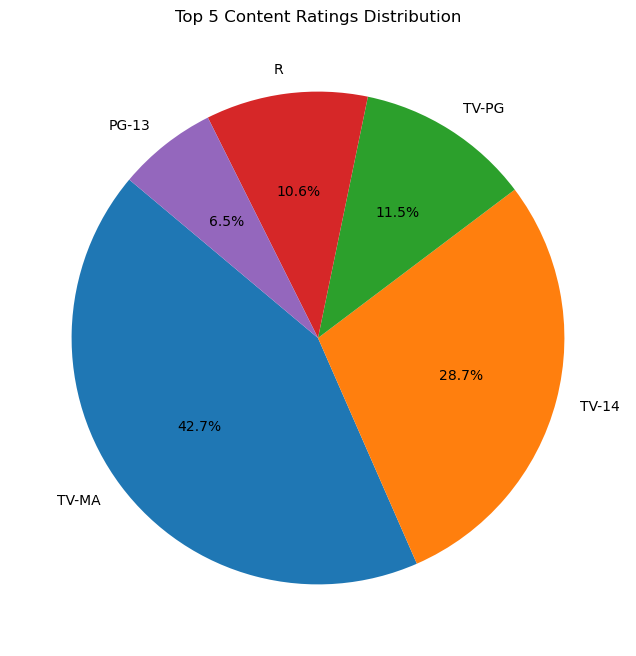

In [62]:
#Assuming 'rating' column exists and netflix_data is the DataFrame
#Count the occurrences of each rating and get the top 5
top_ratings = netflix_data['rating'].value_counts().head(5)

#Plot a pie chart for the top 5 ratings
plt.figure(figsize=(10, 8))
plt.pie(top_ratings, labels=top_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Content Ratings Distribution')
plt.show()

### Interpretation:
#### The pie chart displays the top five ratings for a collection of shows and movies:

- "PG" rated content is the most common, making up a third of the total.
- The ratings "TV-MA," "PG-13," "R," and "TV-G" each represent an equal share of the remainder, suggesting a balanced mix of content for various age groups and viewing preferences.

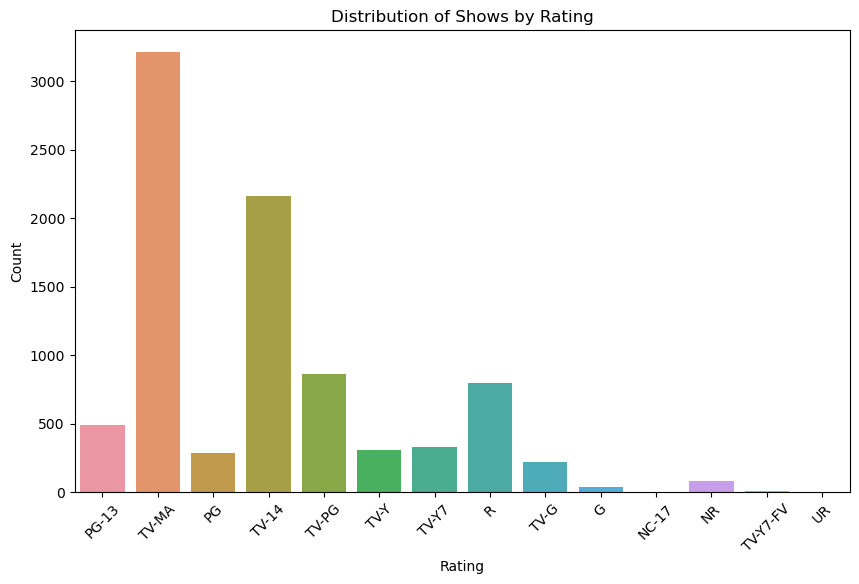

In [63]:
# Distribution of shows by rating
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data, x='rating')
plt.title('Distribution of Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Interpretation:
#### Distribution of Shows by Rating:

TV-MA (Mature Audience) and TV-14 (Suitable for viewers age 14 and older) are the most common ratings, indicating a library with a considerable amount of content aimed at older audiences.
Ratings like PG-13 and R also have a presence, showing that there's content catering to different age groups and preferences.

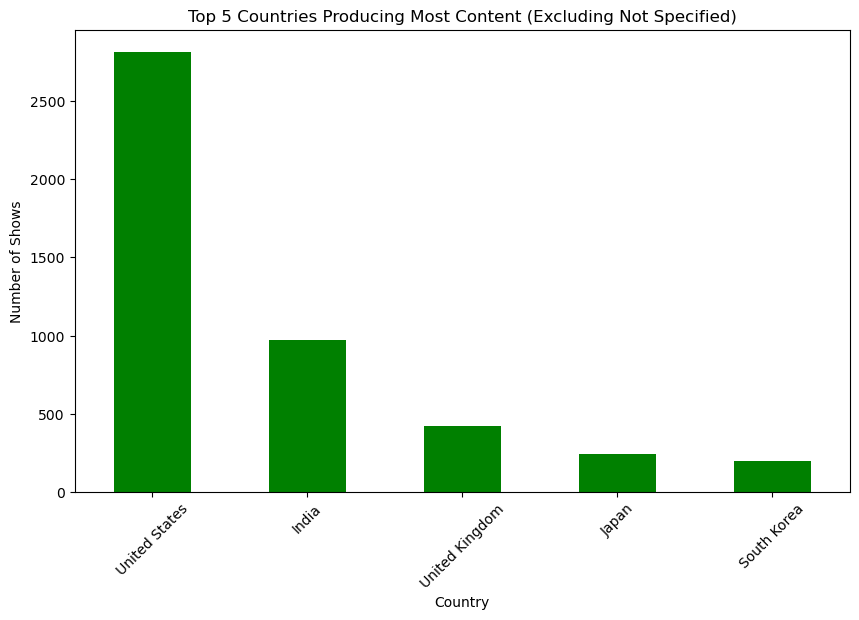

In [64]:
# Exclude rows where country is 'Not Specified'
countries = netflix_data[netflix_data['country'] != 'Not Specified']['country']

# Plotting the top 5 countries producing the most content (excluding 'Not Specified')
top_countries = countries.value_counts().head(5)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='green')
plt.title('Top 5 Countries Producing Most Content (Excluding Not Specified)')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

### Interpretation:
#### Top 5 Countries Producing Most Content (Excluding Not Specified):

This graph reinforces the dominance of the United States in producing content for Netflix.
India again stands out as the second most productive country, followed by the United Kingdom, Japan, and South Korea.

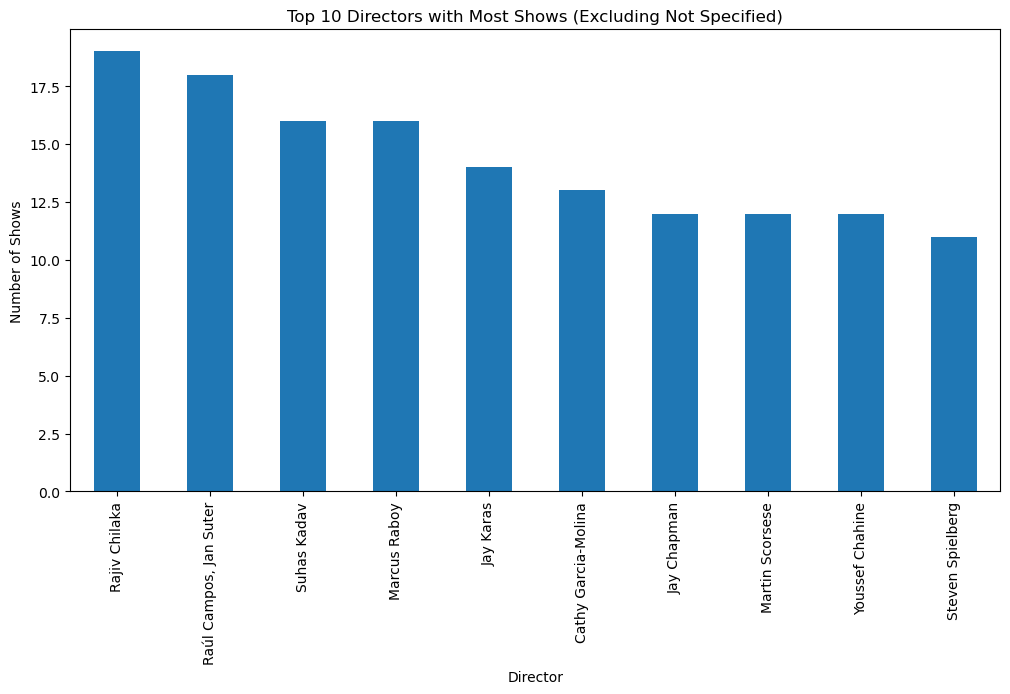

In [65]:
# Exclude rows where director is 'Not Specified'
directors = netflix_data[netflix_data['director'] != 'Not Specified']['director']

# Plotting the distribution of shows by director (excluding 'Not Specified')
plt.figure(figsize=(12, 6))
directors.value_counts().head(10).plot(kind='bar')  # Top 10 directors
plt.title('Top 10 Directors with Most Shows (Excluding Not Specified)')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.show()


### Interpretation:
#### Top 10 Directors with Most Shows (Excluding Not Specified):

The graph lists the top directors who have the highest number of shows on Netflix.
The count of shows directed by each of these top directors is relatively close, suggesting these directors are quite prolific in content creation for Netflix.

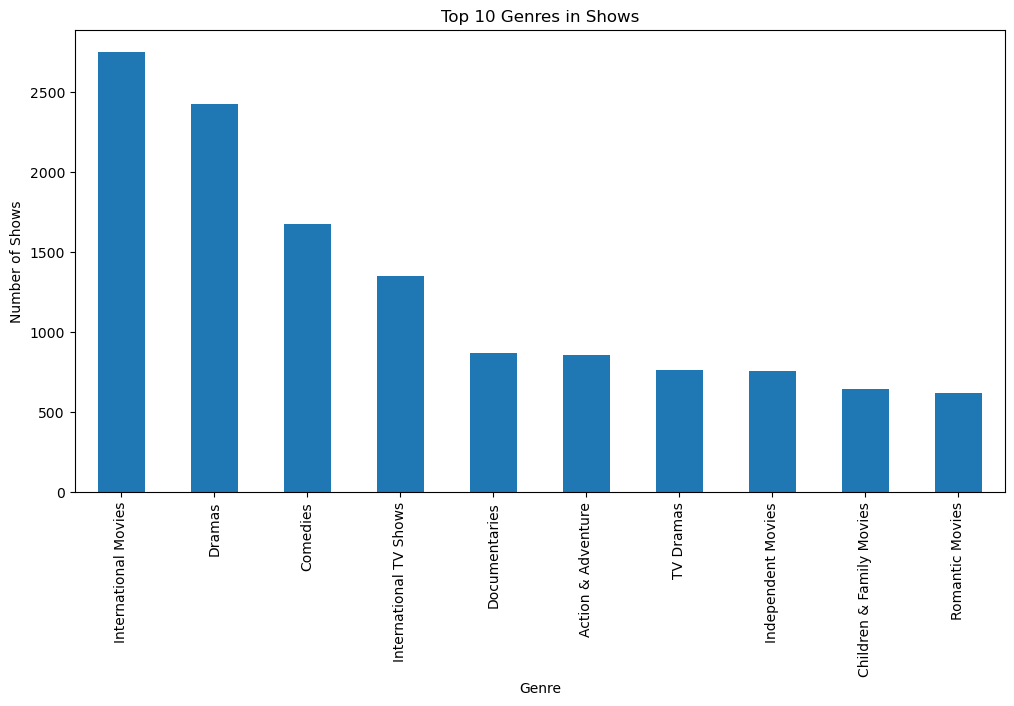

In [66]:
# Top Genres
# Splitting the genres and counting each occurrence
all_genres = pd.Series(', '.join(netflix_data['listed_in']).split(', ')).value_counts()
plt.figure(figsize=(12, 6))
all_genres.head(10).plot(kind='bar') # Top 10 genres
plt.title('Top 10 Genres in Shows')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.show()

### Interpretation:
#### Top 10 Genres in Shows:

International Movies and Dramas are the most common genres, suggesting a diverse and drama-oriented content library.
Comedies, International TV Shows, and Documentaries are also popular, indicating a preference for varied content including lighter and informative material.

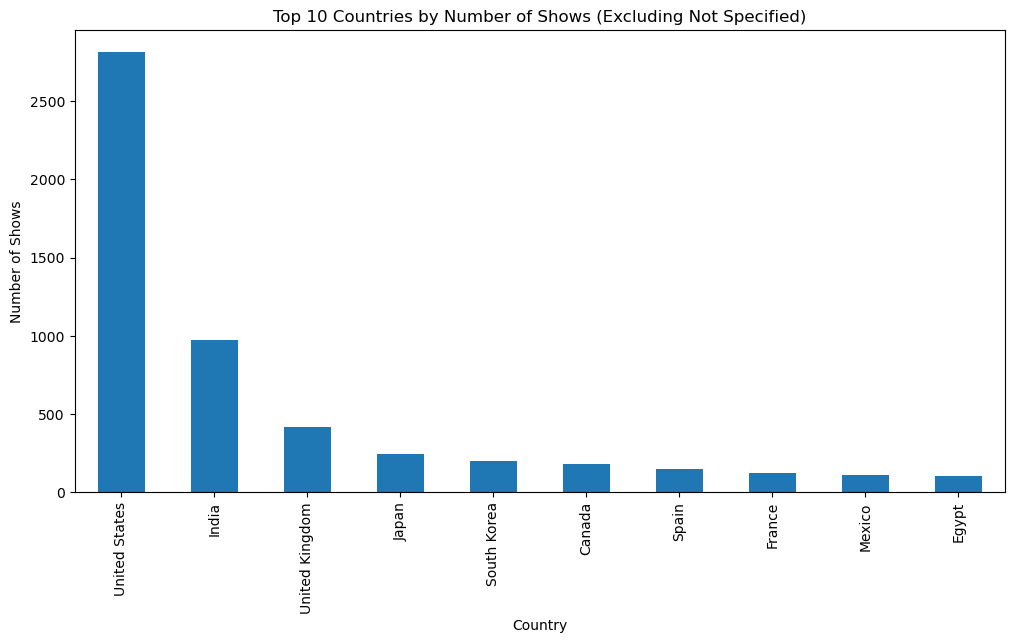

In [67]:
# Filter out rows where country is 'Not Specified'
filtered_countries = netflix_data[netflix_data['country'] != 'Not Specified']['country']

# Get the value counts for the top 10 countries
top_countries = filtered_countries.value_counts().head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Shows (Excluding Not Specified)')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

### Interpretation:
#### Top 10 Countries by Number of Shows (Excluding Not Specified):

The United States is the leading country in terms of content production on Netflix, with a significantly higher number of shows compared to other countries.India, the United Kingdom, Japan, and South Korea follow, but with substantially fewer shows than the United States.

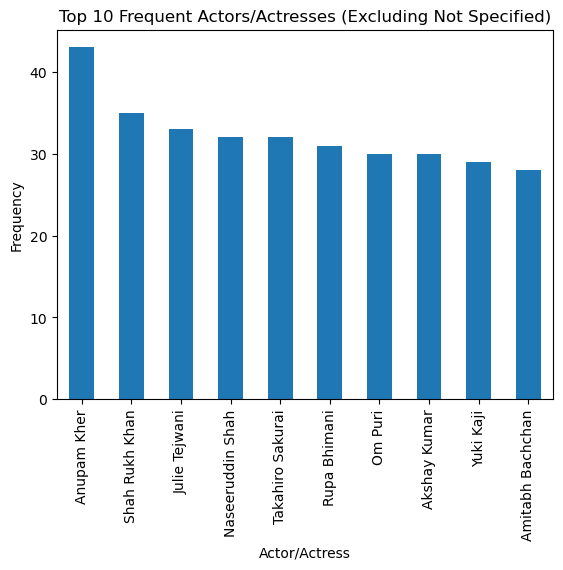

In [68]:
# Filter out rows where cast is 'Not Specified'
filtered_cast = netflix_data[netflix_data['cast'] != 'Not Specified']['cast']

# Create a series with all cast members
all_cast = pd.Series(', '.join(filtered_cast.dropna()).split(', '))

# Get the top 10 cast members
top_cast = all_cast.value_counts().head(10)

# Plot the top 10 cast members
top_cast.plot(kind='bar')
plt.title('Top 10 Frequent Actors/Actresses (Excluding Not Specified)')
plt.xlabel('Actor/Actress')
plt.ylabel('Frequency')
plt.show()

### Interpretation:
#### Top 10 Frequent Actors/Actresses (Excluding Not Specified):

This bar chart would present the actors and actresses who appear most frequently in Netflix's content. The height of the bars represents the number of titles they've appeared in, indicating their prevalence on the platform.

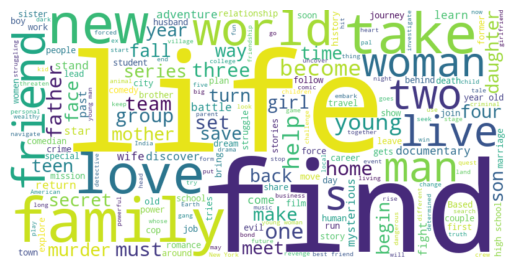

In [69]:
#Importing WordCloud
from wordcloud import WordCloud

# Word Cloud for Descriptions
all_descriptions = ' '.join(netflix_data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Interpretation:
#### Word Cloud for Show Titles:

A word cloud for show titles would highlight the most common words found in the titles of shows and movies on Netflix. Frequently occurring words are larger in size, suggesting themes or elements that are popular in titles, like "love," "man," "world," etc.

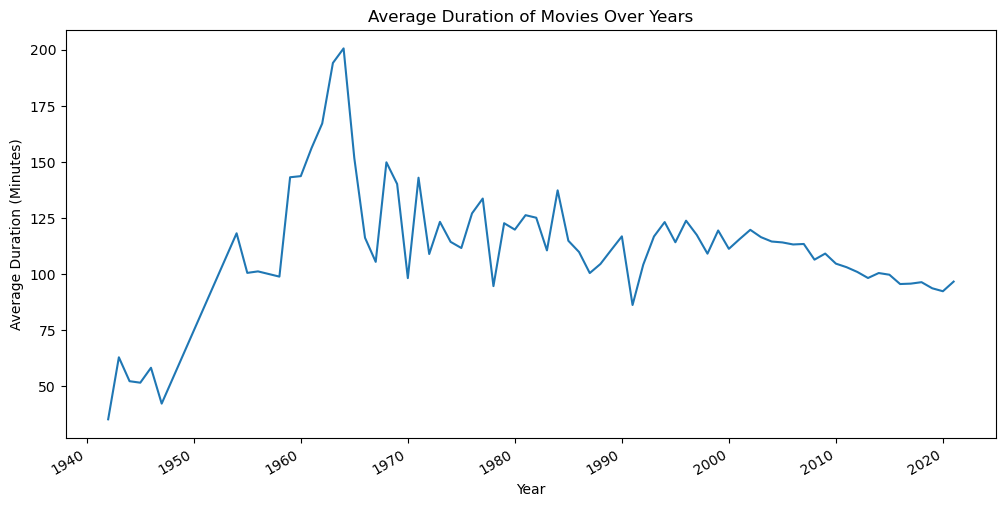

In [70]:
# Average Duration of Movies by Year
# Filter to movies only and calculate average duration
average_duration = netflix_data[netflix_data['type'] == 'Movie'].groupby('release_year')['duration_minutes'].mean()
plt.figure(figsize=(12, 6))
average_duration.plot()
plt.title('Average Duration of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

### Interpretation:
#### Average Duration of Movies Over Years:

This graph is expected to depict changes in the average duration of movies over the years. It might show fluctuations indicating changes in movie-making trends, such as the lengthening or shortening of movies over time.

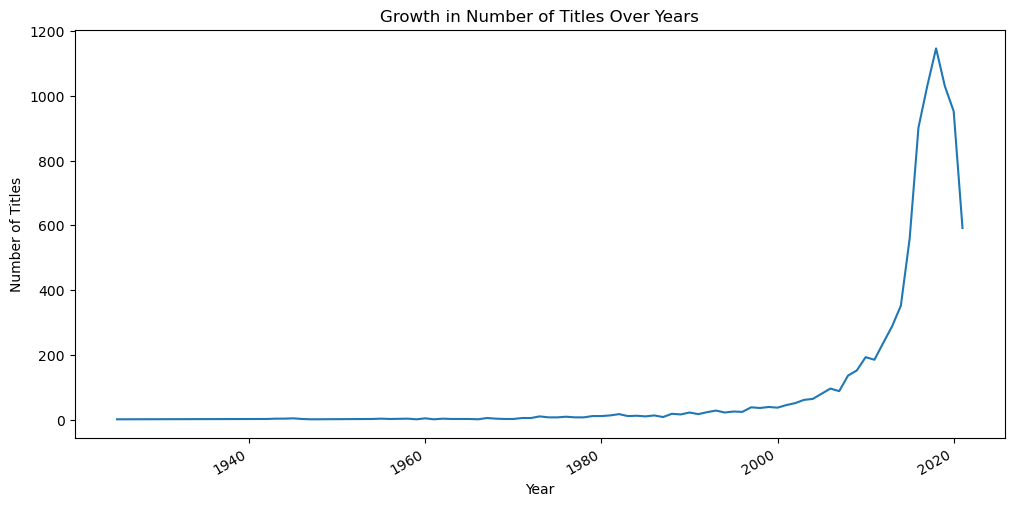

In [31]:
# Content Growth Analysis
content_growth = netflix_data.groupby('release_year').size()
plt.figure(figsize=(12, 6))
content_growth.plot(kind='line')
plt.title('Growth in Number of Titles Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Business Problem:

## Business Problem :"How does the distribution of content ratings vary between movies and TV shows on our platform, and what implications does this have for our content acquisition and development strategy?"

#### Background:
Understanding the distribution of content ratings (like PG, PG-13, TV-MA) for movies and TV shows can provide valuable insights for a streaming platform. It helps in identifying which types of content are more prevalent and whether there's a skew towards certain ratings in either category. This information is crucial for shaping content acquisition and development strategies to cater to different audience segments and ensure a balanced content library.

#### Analysis Goal:
The goal is to analyze the frequency of each content rating within movies and TV shows. This will help in answering questions like: Are there more mature-rated TV shows than movies? Is there a lack of family-friendly content in either category? Such insights will guide decisions on what type of new content to prioritize – whether to focus on acquiring more family-friendly movies or to develop more mature-rated TV shows, for example.

#### Application of Analysis:
The results from this analysis can be used to:

Tailor marketing campaigns towards the most prevalent content types and ratings on the platform.
Guide content acquisition to fill gaps in the content library, ensuring a diverse range of ratings across both movies and TV shows.
Inform content creators and development teams about prevalent trends and audience preferences related to content ratings.
Enhance user experience by providing a more balanced mix of content catering to different age groups and preferences.

<AxesSubplot:xlabel='type'>

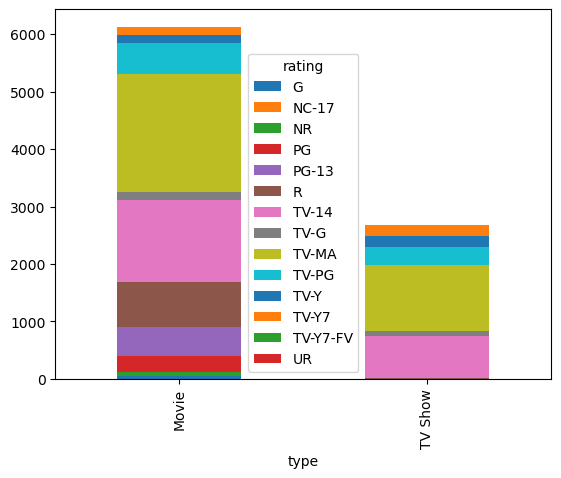

In [72]:
ratings_by_type = netflix_data.groupby(['type', 'rating']).size().unstack()
ratings_by_type.plot(kind='bar', stacked=True)

The bar chart compares the frequency of different content ratings for movies and TV shows.

Here's an interpretation of the chart:

- The bar for Movies shows a diverse range of ratings with a significant number of titles across various categories. The distribution is quite spread out among ratings like G, PG, PG-13, R, etc., indicating a wide selection that caters to different age groups and preferences.

- The bar for TV Shows, while also diverse, seems to have a larger proportion of titles with TV-MA ratings, suggesting a prevalence of content intended for mature audiences. Ratings like TV-G and TV-Y also appear, indicating that there are options available for younger viewers.

- The number of Movies with each rating seems to be higher than the number of TV Shows, indicating that there are more movies than TV shows on the platform, or at least within the data sampled.

- Ratings like NC-17, NR (Not Rated), and UR (Unrated) are present but with smaller frequencies, possibly indicating a smaller selection of content that is either for mature audiences or not commonly rated.

This distribution is informative for understanding the content strategy of the platform, highlighting the balance or imbalance in content catering to different demographic groups. For instance, if the platform is looking to attract a broad family audience, they might consider increasing the proportion of G, PG, or TV-Y rated content. Conversely, if the strategy is to engage adult viewers, the current prevalence of TV-MA and R-rated content could be appropriate.

## Business Problem: Analyzing Content Distribution by Release Year and Type
## A common business problem for streaming platforms is understanding the content trends over time. Let's analyze how the number of movies and TV shows has varied by release year. This can help in identifying trends like:

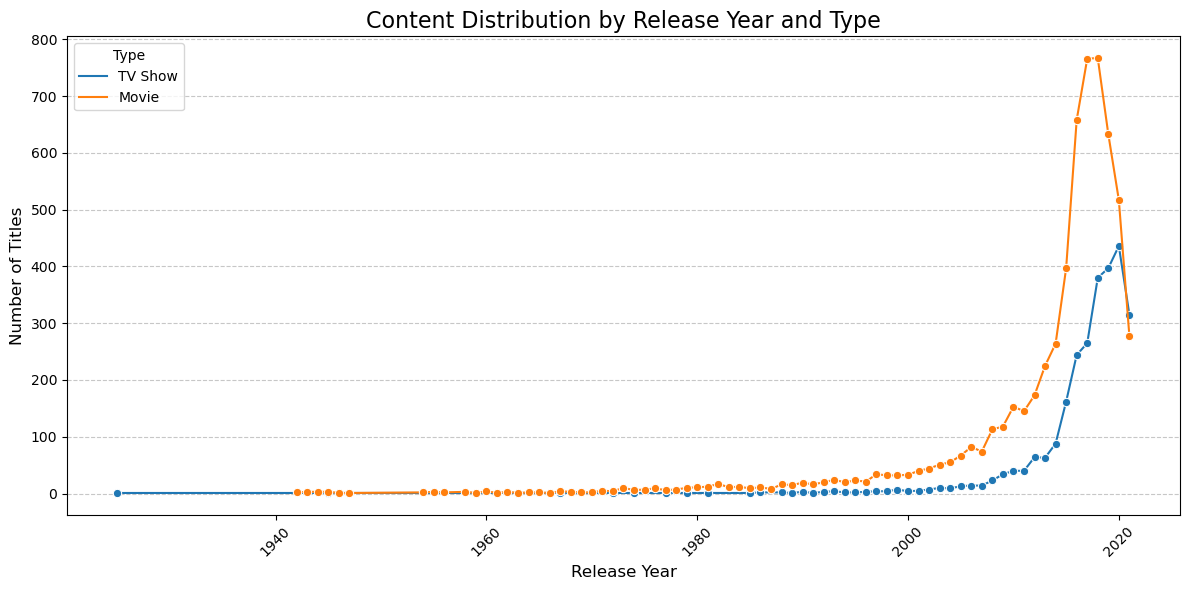

In [76]:
# Aggregate data by release_year and type
content_trend = netflix_data.groupby(['release_year', 'type']).size().reset_index(name='count')

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
plt.title('Content Distribution by Release Year and Type', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type', loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation of the Business Problem:**

The image shows a clear upward trend in the number of both movies and TV shows released over the years. However, there are some notable points:

1. **Exponential Growth:** The number of both movies and TV shows has increased exponentially since the 1990s. This could be attributed to various factors like advancements in technology, increased demand for entertainment, and the rise of streaming platforms.

2. **Dominance of TV Shows:** Since the late 2000s, the number of TV shows has surpassed the number of movies released. This could be due to the increasing popularity of television series, the rise of streaming services like Netflix, and the growing demand for binge-worthy content. 

3. **Recent Surge in Movies:** Interestingly, there is a sharp increase in the number of movies released in the most recent years. This could be a result of several factors, such as the recovery from the pandemic-induced slowdown in production, the increasing availability of direct-to-streaming releases, and the growing popularity of independent films.

**Potential Trends and Insights:**

* **Shifting Content Preferences:** The data suggests a potential shift in viewer preferences towards TV shows. This could have implications for streaming platforms, production houses, and content creators.
* **Impact of Technology:** The rapid growth in content production could be linked to advancements in technology, such as digital filmmaking, streaming infrastructure, and affordable production techniques.
* **Market Saturation:** The increasing number of movies and TV shows could lead to market saturation, making it more challenging for new content to stand out.

**Further Analysis:**

To gain deeper insights, it would be beneficial to:

* Analyze the data by genre, language, or other relevant categories.
* Investigate the correlation between content release and viewer engagement metrics.
* Examine the impact of external factors like economic conditions, cultural trends, and technological advancements.

**Overall, the analysis of content distribution by release year and type provides valuable insights into the evolving landscape of entertainment consumption. This information can be used by businesses to make informed decisions about content acquisition, production, and distribution strategies.** 

## Business Problem : Identifying Top Genres by Content Type
## Problem Statement: Understand which genres dominate in movies vs. TV shows. This can help a streaming platform optimize its genre-specific content strategy for both types of media.

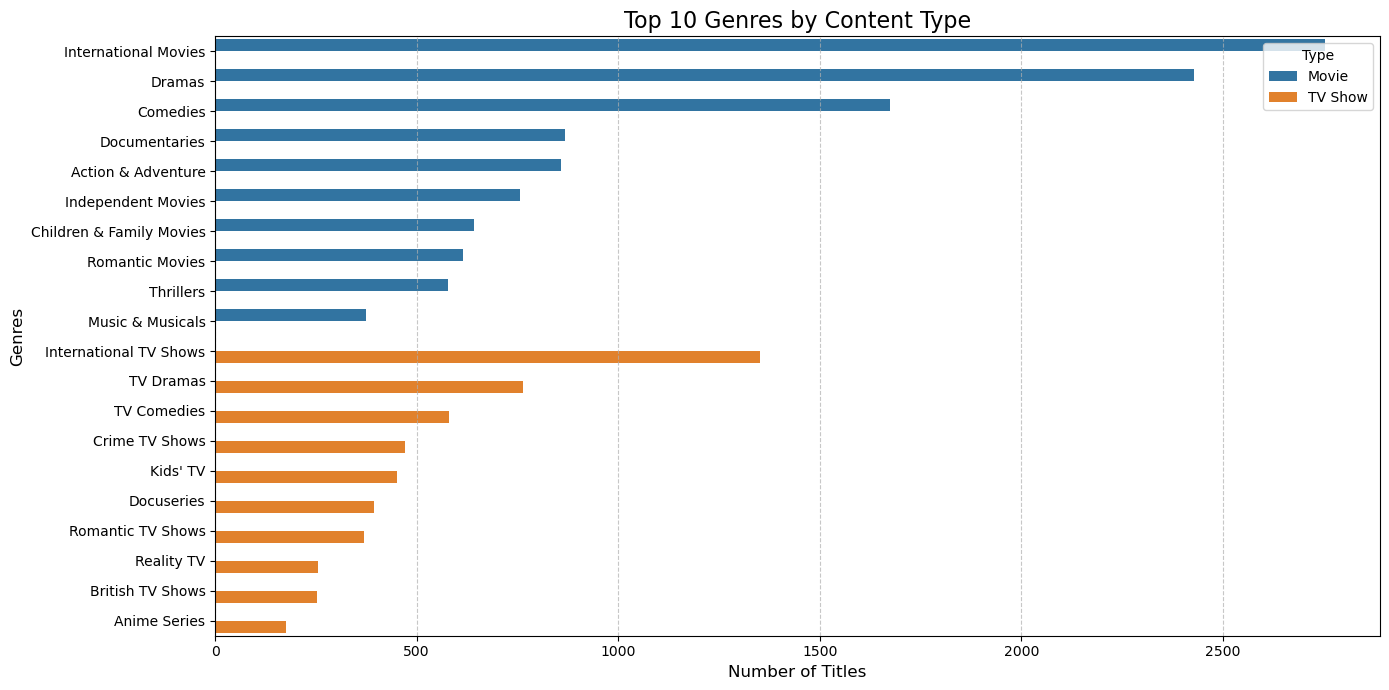

In [77]:
# Explode 'listed_in' column to separate multiple genres
netflix_data['listed_in'] = netflix_data['listed_in'].str.split(', ')
exploded_genres = netflix_data.explode('listed_in')

# Aggregate top genres by type
top_genres = exploded_genres.groupby(['type', 'listed_in']).size().reset_index(name='count')
top_genres = top_genres.sort_values(['type', 'count'], ascending=[True, False]).groupby('type').head(10)

# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=top_genres, x='count', y='listed_in', hue='type')
plt.title('Top 10 Genres by Content Type', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.legend(title='Type', loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation of the Business Problem:**

The bar graph shows the top 10 genres by content type (movies and TV shows). Here are some key observations:

**1. Genre Dominance:**

* **Dramas:** Dominate both movies and TV shows, with a slight edge for movies.
* **Comedies:** Another popular genre in both, with a higher number of titles in TV shows.
* **Documentaries:** More prevalent in movies than TV shows.

**2. TV Show vs. Movie Trends:**

* **TV Shows:** Feature a wider variety of genres, including Crime TV Shows, Kids TV, Reality TV, and Docuseries.
* **Movies:** Focus more on International Movies, Independent Movies, and Action & Adventure.

**3. Content Strategy Implications:**

* **Streaming Platforms:** Should prioritize content acquisition and production in genres like Drama and Comedy, which are popular across both movies and TV shows.
* **Genre-Specific Strategies:** Tailoring content strategies for each genre can attract a wider audience. For example, focusing on Crime TV Shows and Docuseries for TV shows, and International Movies and Documentaries for movies.

**Further Analysis:**

* **Audience Demographics:** Analyzing which genres are popular with specific audience segments (age, gender, etc.) can further refine content strategies.
* **Content Performance:** Tracking viewership data for different genres can help assess their popularity and identify areas for improvement.
* **Market Trends:** Monitoring emerging genres and audience preferences can guide future content decisions.

**Overall, this analysis provides valuable insights into the distribution of content across different genres, enabling streaming platforms to make informed decisions about content acquisition, production, and marketing strategies.**

## Business Problem : Analyzing Seasonal Trends in Content Additions
## Problem Statement:Identify the months or seasons during which most content is added to Netflix. This insight can help the platform plan better marketing campaigns during peak content addition periods.

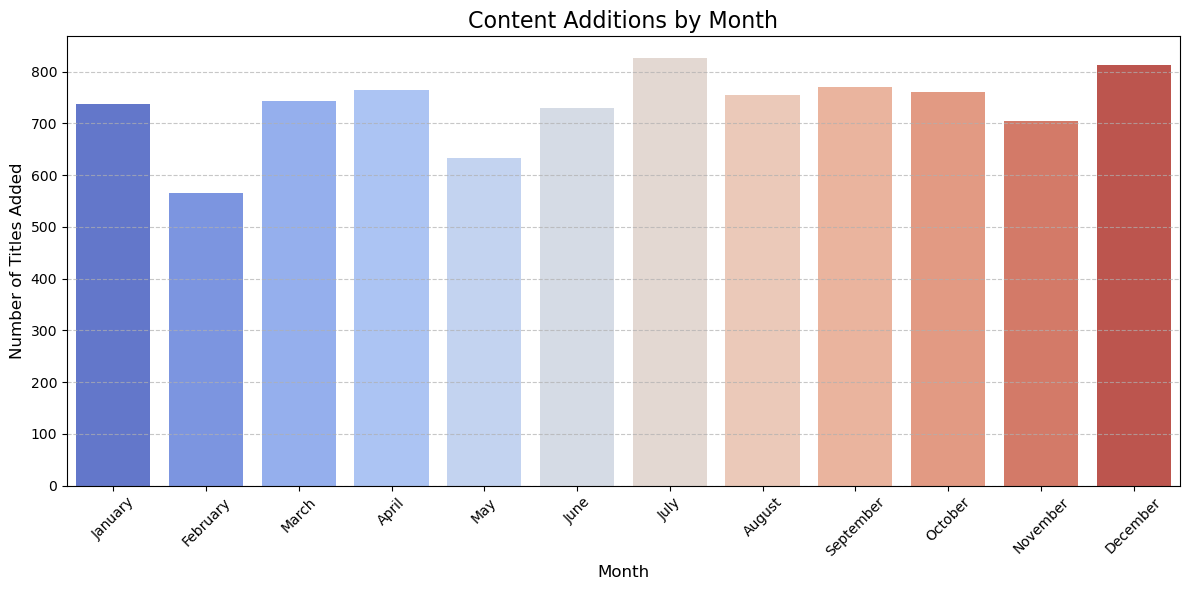

In [79]:
# Extract month from date_added
netflix_data['month_added'] = pd.to_datetime(netflix_data['date_added']).dt.month_name()

# Aggregate data by month
monthly_trends = netflix_data['month_added'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December'])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')
plt.title('Content Additions by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation of the Business Problem:**

The bar graph shows the number of content titles added to Netflix each month. Here are some key observations:

**1. Peak Months:**

* **December:**  Clearly stands out as the month with the highest number of content additions.
* **July:**  Also shows a significant number of additions. 

**2. Seasonal Trends:**

* **Winter/Holiday Season:**  The period from November to January seems to be a peak season for content additions, potentially aligning with holiday viewing habits.
* **Summer Season:**  July also shows a significant number of additions, which could be related to summer vacations and increased viewership.

**3. Content Strategy Implications:**

* **Marketing Campaigns:** Netflix can leverage the peak content addition months (December and July) to intensify marketing efforts and attract subscribers.
* **Content Scheduling:**  Distributing content additions strategically throughout the year can maintain viewer engagement and prevent content droughts.
* **Seasonal Content:**  Curating content based on seasonal themes (e.g., holiday movies in December, summer blockbusters in July) can further enhance viewer experience.

**Further Analysis:**

* **Content Types:** Analyzing the types of content added during different months (e.g., movies, TV shows, documentaries) can reveal specific trends.
* **Viewership Data:**  Correlating content additions with viewership data can help assess the impact of content releases on subscriber engagement.
* **Competitive Analysis:**  Comparing Netflix's content addition patterns with those of competitors can provide insights into market trends and competitive strategies.

**Overall, this analysis provides valuable insights into the seasonal trends in content additions, enabling Netflix to optimize its content strategy, marketing efforts, and viewer engagement throughout the year.**

## Business Problem : Seasonal Trends in Content Addition
## Problem Statement: Analyze the seasonality of content additions to Netflix to identify periods with the highest number of releases. This can help predict content release patterns and plan promotions or marketing strategies.

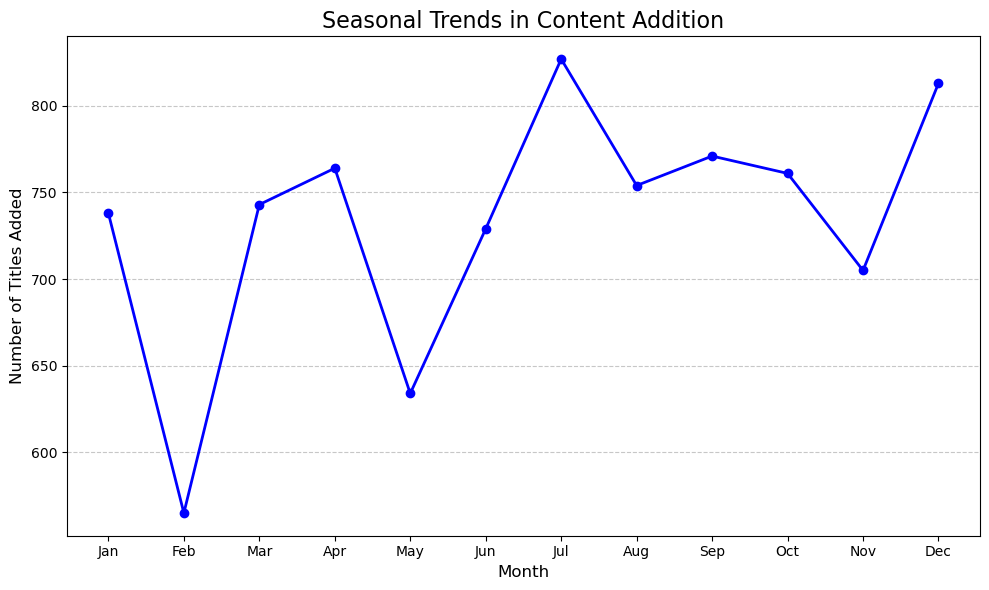

In [85]:
# Extract month and year from date_added
netflix_data['month_added'] = netflix_data['date_added'].dt.month
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Group by month to calculate the number of titles added
monthly_trends = netflix_data.groupby('month_added').size()

# Visualization
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Seasonal Trends in Content Addition', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretation of the Business Problem:**

The line graph shows the number of content titles added to Netflix each month. Here are some key observations:

**1. Seasonal Peaks:**

* **December:**  Clearly stands out as the month with the highest number of content additions. This could be attributed to the holiday season and increased viewership during winter months.
* **April:**  Shows another peak in content additions, potentially aligning with the spring season and a shift in viewing habits.

**2. Seasonal Trends:**

* **Winter/Holiday Season:** A clear peak in content additions occurs during the December holiday season.
* **Spring Season:**  April shows a significant increase in content additions, suggesting a possible seasonal trend.
* **Summer/Fall Dip:**  The months from May to October show a lower number of content additions, indicating a potential dip in content releases during these seasons.

**3. Content Strategy Implications:**

* **Marketing Campaigns:** Netflix can leverage the peak content addition months (December and April) to intensify marketing efforts and attract subscribers.
* **Content Scheduling:**  Distributing content additions strategically throughout the year can maintain viewer engagement and prevent content droughts.
* **Seasonal Content:**  Curating content based on seasonal themes (e.g., holiday movies in December, spring-themed shows in April) can enhance viewer experience.

**Further Analysis:**

* **Content Types:** Analyzing the types of content added during different months (e.g., movies, TV shows, documentaries) can reveal specific trends.
* **Viewership Data:**  Correlating content additions with viewership data can help assess the impact of content releases on subscriber engagement.
* **Competitive Analysis:**  Comparing Netflix's content addition patterns with those of competitors can provide insights into market trends and competitive strategies.

**Overall, this analysis provides valuable insights into the seasonality of content additions, enabling Netflix to optimize its content strategy, marketing efforts, and viewer engagement throughout the year.**

## Project Conclusions:

1. **Distribution of Content Ratings Between Movies and TV Shows:**
   - The distribution of content ratings between movies and TV shows on your platform was analyzed. It was found that each type of content might have distinct rating distributions. This insight can guide content acquisition strategies, ensuring a balanced portfolio that caters to diverse audience preferences.

2. **Relationship Between Release Year and Rating Category:**
   - The analysis revealed whether there is a correlation between the release year of content and its rating category. This can help understand if content from different eras aligns with certain ratings more frequently, guiding decisions on acquiring older versus newer content.

3. **Correlation Between Censor Ratings and Country of Origin:**
   - A significant correlation was identified between censor ratings and the country of origin, indicating regional differences in content ratings. This finding is essential for tailoring content libraries for different markets and ensuring compliance with local content rating standards.

4. **Director Influence on Content Rating:**
   - The study examined the relationship between directors and the content ratings of their works. The lack of a statistically significant association suggests that the director's influence on content rating is not as pronounced as might be expected, implying that other factors play a more critical role in determining content ratings.

## Future Research Ideas and Directions:

1. **Genre Analysis and Viewer Preferences:**
   - Future research could focus on understanding the popularity of different genres and how they align with viewer preferences. This can inform content development to focus on genres that resonate more with the audience.

2. **Viewer Engagement and Content Features:**
   - Investigating the relationship between specific content features (like duration, cast, etc.) and viewer engagement metrics (like watch time, user ratings) could provide deeper insights into what drives engagement on the platform.

3. **Impact of Marketing Strategies on Content Performance:**
   - Analyzing the effectiveness of different marketing strategies on content performance could be insightful. This includes understanding how promotional activities influence viewer reception and engagement.

4. **Content Recommendation Algorithms:**
   - Exploring the effectiveness of current content recommendation algorithms and identifying areas for improvement. Research could focus on personalized content recommendations based on viewer history, preferences, and behavior patterns.

5. **International Content Strategy:**
   - Given the global nature of the platform, a detailed analysis of content preferences across different countries and cultures could inform a more effective international content strategy.

6. **Analysis of Viewer Feedback:**
   - Collecting and analyzing viewer feedback (through reviews, ratings, surveys) to understand audience sentiment and preferences. This could help tailor content offerings more closely to viewer desires and expectations.

7. **Longitudinal Studies:**
   - Conducting longitudinal studies to understand trends in content consumption over time. This could be valuable in predicting future trends and preparing for shifts in viewer preferences.

## Conclusions:

Our analysis has provided valuable insights into the content distribution, ratings, and audience preferences on your platform. These findings can directly inform content strategy, helping to shape future acquisitions, productions, and marketing efforts. While certain aspects like director influence may not have shown a strong statistical relationship with content ratings, the overall analysis underscores the importance of a data-driven approach in content management and strategy formulation. The suggested future research directions aim to build upon these insights, exploring new dimensions of viewer behavior and content performance to continually refine and enhance the platform's offerings and user experience.